In [39]:
import pandas as pd
import numpy as np
california = pd.read_csv("C:\\Users\\negin\\Desktop\\EXAMS\\housing.csv", header = None, dtype='object')
california.head()

,0,1,2,3,4,5,6,7,8,9
0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [29]:
import statsmodels.api as sm 

In [40]:
target = pd.DataFrame(data=california.values[:, 8], columns=["Target"], dtype='object')
others = pd.DataFrame(data=california.values[:,:8])


target
others

,0,1,2,3,4,5,6,7
0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
...,...,...,...,...,...,...,...,...
20636,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20637,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20638,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7
20639,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [52]:
dt = pd.read_csv("C:\\Users\\negin\\Desktop\\EXAMS\\housing.csv", header = None , skiprows=1 , names = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity'])
dt

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [54]:
dt.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [100]:
cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
X = dt[cols]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [105]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
X = impute_it.fit_transform(X)

In [112]:
np.array(X)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [122]:
mean_value=dt['total_bedrooms'].mean()
mean_value

dt['total_bedrooms'].fillna(value=mean_value, inplace=True)
print('total_bedrooms :')
dt

total_bedrooms :


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [123]:
dt.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [246]:
def information_of_data(dt):
  print(dt.info())
information_of_data(dt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


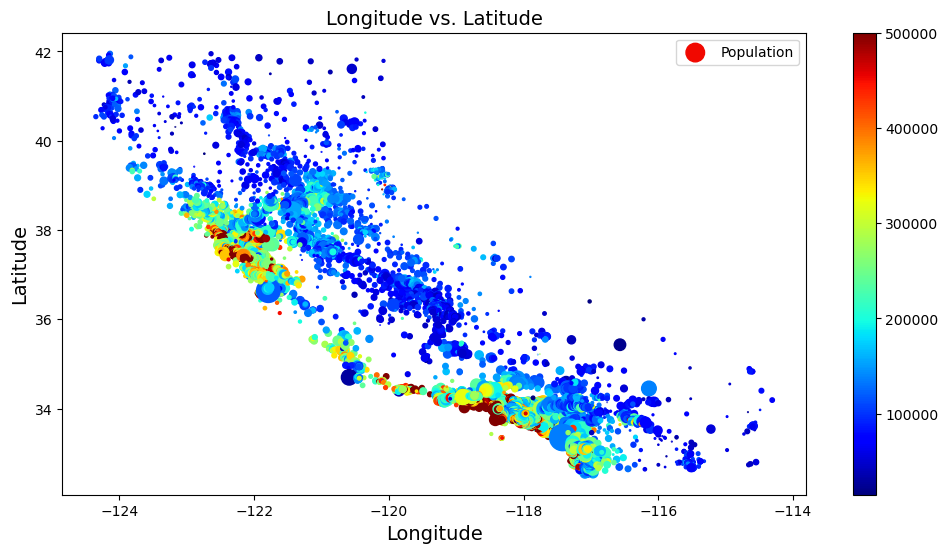

In [73]:
import matplotlib.pyplot as plt
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=dt['longitude'], y=dt['latitude'], 
                 s=dt['population']/100, c=dt['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

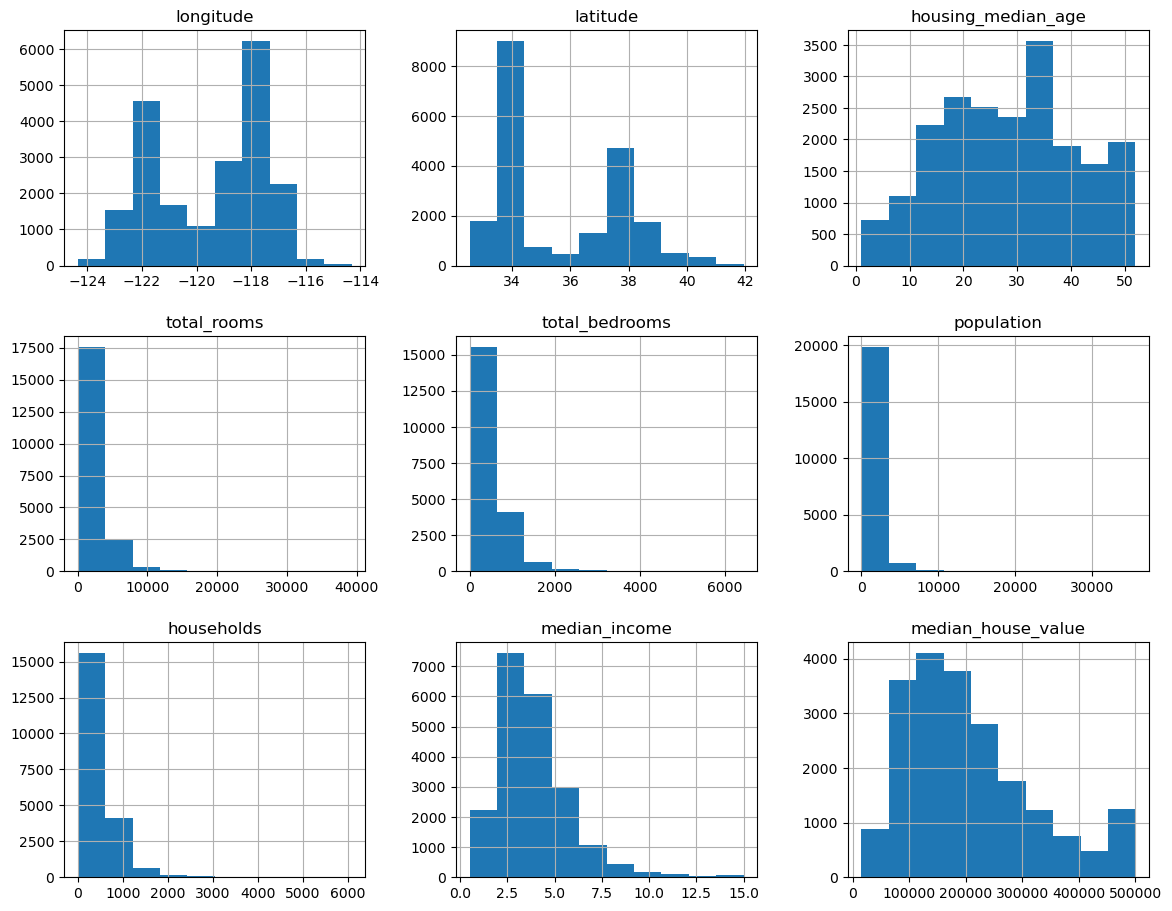

In [218]:
def print_histograms(dt):
  dt.hist(bins=10,figsize=(14,11))
print_histograms(dt) 

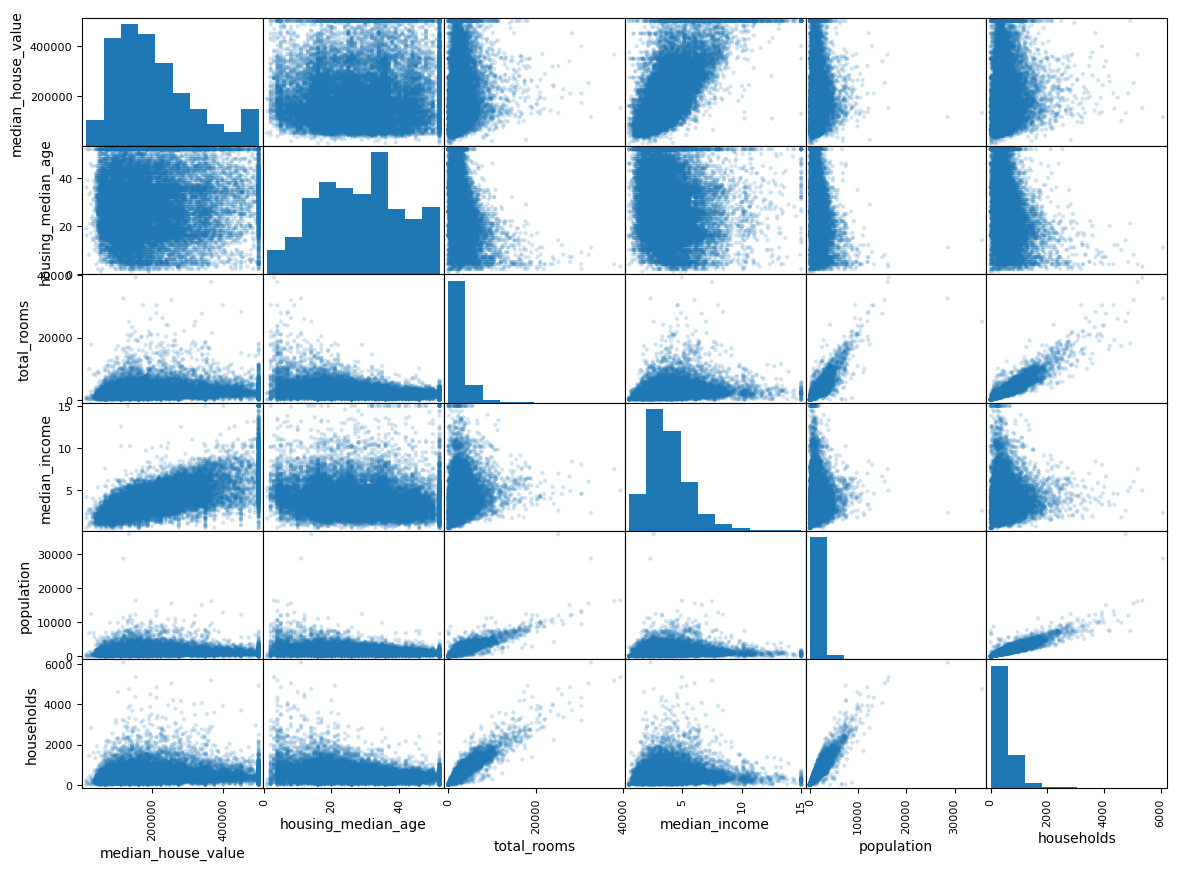

In [220]:
def print_scatter_matrix(dt):
  df = dt[['median_house_value','housing_median_age','total_rooms','median_income','population','households']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(14,10))
print_scatter_matrix(dt) 

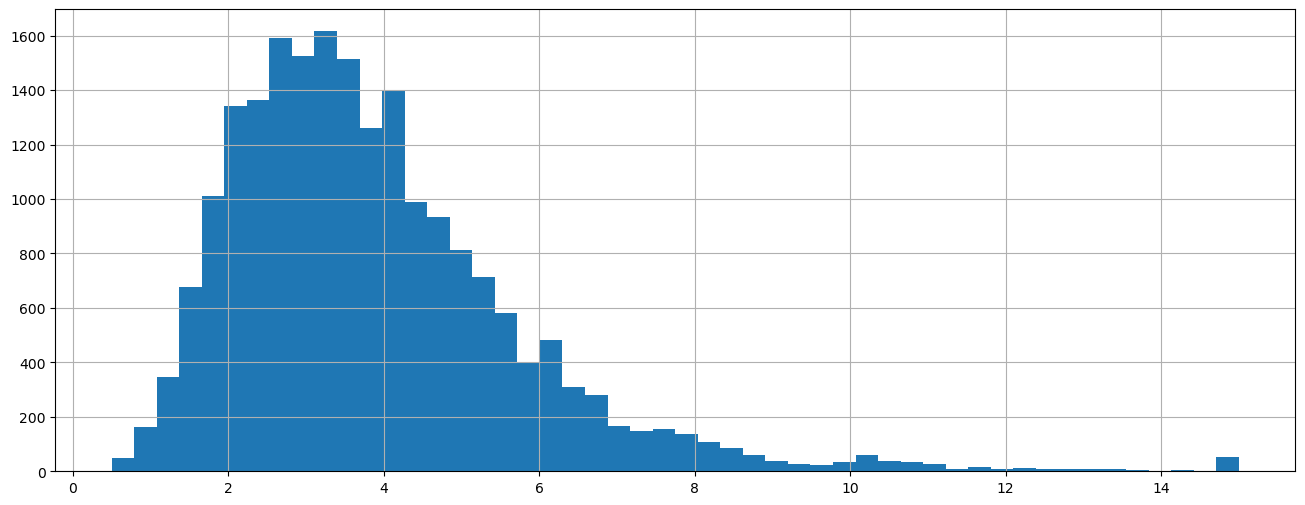

In [221]:
def vizualization_of_median_income(dt):
  dt['median_income'].hist(bins=50, figsize=(16,6))
  plt.show()
vizualization_of_median_income(dt)

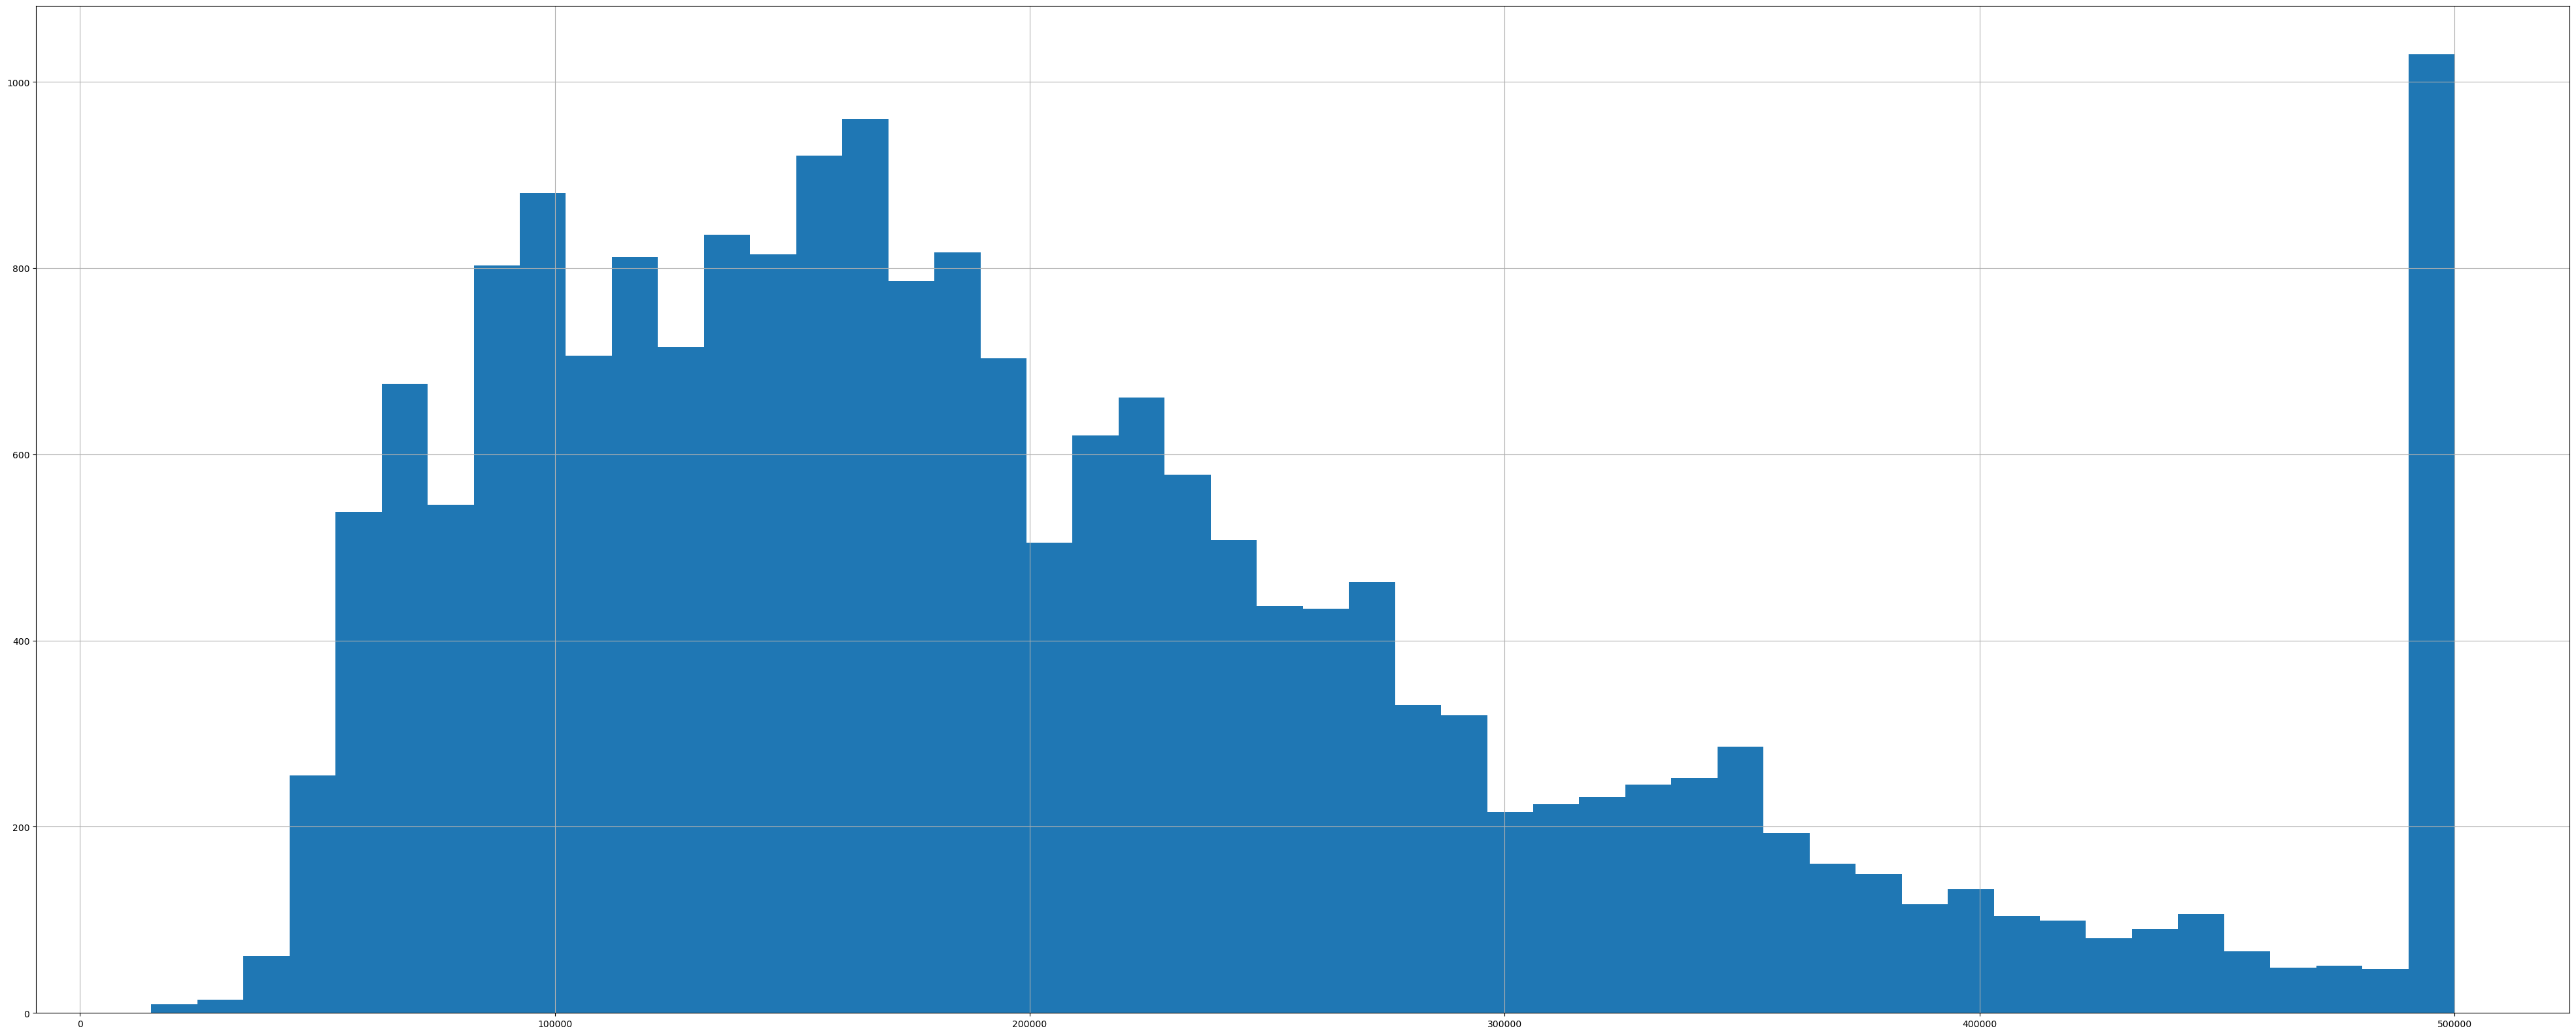

In [244]:
def median_house_value(dt):
  dt['median_house_value'].hist(bins=50, figsize=(50,20))
  plt.show()
median_house_value(dt)

In [245]:
dt['median_house_value'].mean()

206855.81690891474

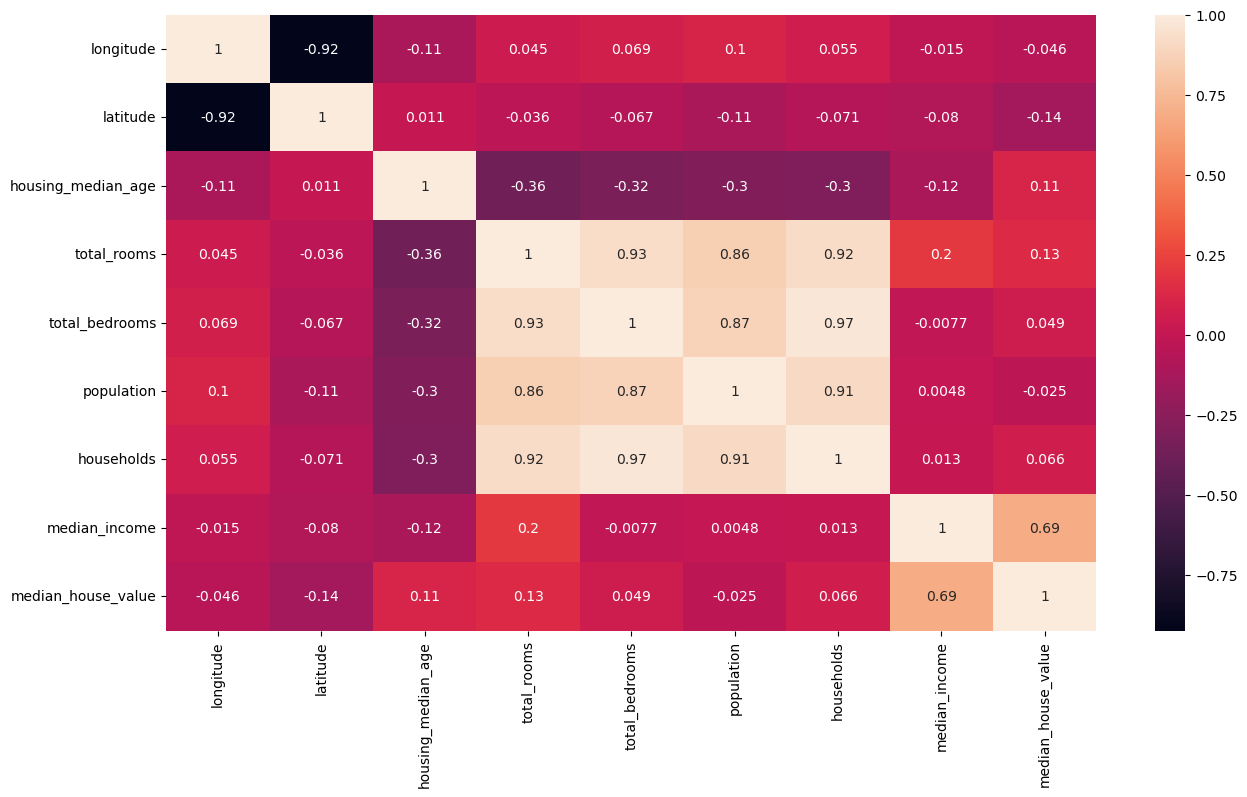

In [237]:
# CORRELATION
def compute_correlations_matrix_with_seaborn_visualization(dt):
  cor=dt.corr()
  plt.subplots(figsize=(15,8))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(dt)

In [228]:
## Compute correlations price ratio: 

In [223]:
def compute_correlations_price_ratio(dataset):
  correlations = dt.corr()
  res = correlations["median_house_value"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(dt)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64


In [235]:
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


def housing_fit_model_prediction(data):
  X = dt[['housing_median_age','population', 'total_rooms', 'median_income','total_bedrooms','latitude','longitude']] ## X usually means our input variables (or independent variables)
  y = data['median_house_value']
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
  models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(), 
              "DecisionTreeRegressor":DecisionTreeRegressor()}
  print("Models accuracy:")
  for key, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
housing_fit_model_prediction(dt)

Models accuracy:
KNeighborsRegressor: 25%
LinearRegression: 63%
DecisionTreeRegressor: 62%


In [171]:
import numpy as np
import statsmodels.api as sm # import statsmodels 

X = dt[['housing_median_age','population', 'total_rooms', 'median_income','total_bedrooms','latitude','longitude',]] ## X usually means our input variables (or independent variables)
Y = dt["median_house_value"]  ## Y usually means our output/dependent variable
#np.asarray(target.astype(float))
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model2 = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model2.predict(X)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     5090.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:24:37   Log-Likelihood:            -2.5952e+05
No. Observations:               20640   AIC:                         5.190e+05
Df Residuals:                   20632   BIC:                         5.191e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.715e+06   6.16e+04    -60.344      0.000   -3.84e+06   -3.59e+06
housing_median_age  1155.3726     43.363     26.644      0.000    1070.378    1240.368
population           -33.8518      0.940    -35.994      0.000     -35.695     -32.008
total_rooms           -6.2984      0.777     -8.110      0.000      -7.821      -4.776
median_income       3.983e+04    332.961    119.621      0.000    3.92e+04    4.05e+04
total_bedrooms       136.1194      3.866     35.205      0.000     128.541     143.698
latitude           -4.379e+04    667.013    -65.647      0.000   -4.51e+04   -4.25e+04
longitude          -4.421e+04    702.859    -62.903      0.000   -4.56e+04   -4.28e+04
==============================================================================
Omnibus:                     4751.306   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16153.595
Skew:                           1.149   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                     4.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
model2

In [173]:
## Split the whole Dataset to Feature & Target
X = dt.drop(columns=['median_house_value','ocean_proximity'], axis=1)   ## Features
y = dt['median_house_value']   ## target

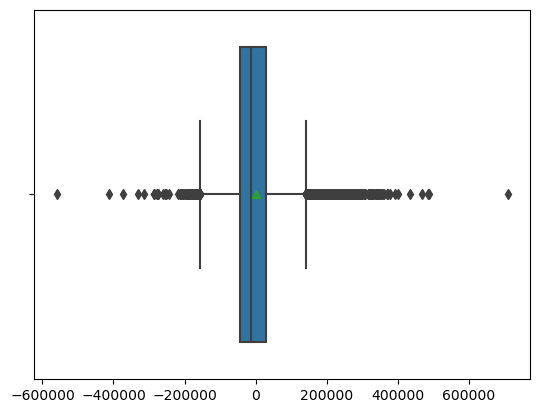

In [172]:
sns.boxplot(x=model2.resid, showmeans=True);


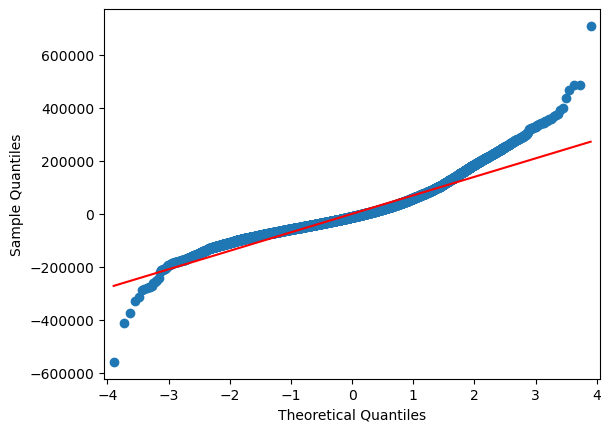

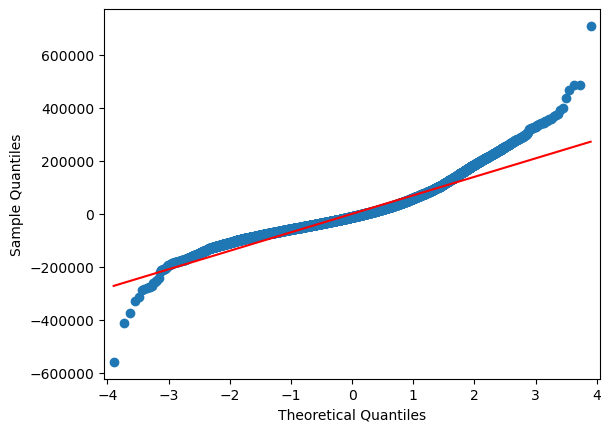

In [174]:
sm.qqplot(model2.resid, line='s')


C:\Users\negin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


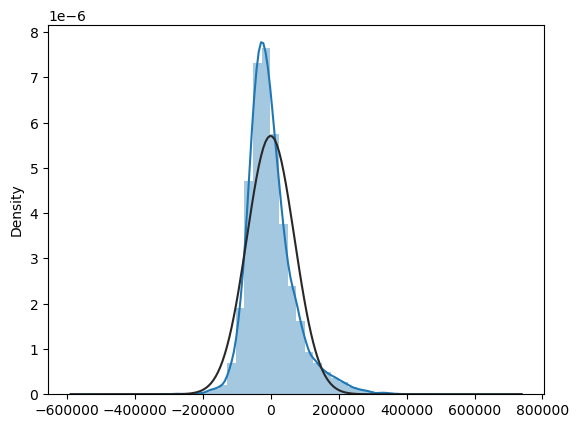

In [175]:
from scipy import stats
sns.distplot(model2.resid, fit=stats.norm);

In [176]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X,Y)

In [177]:
model.intercept_

-3571491.545886914

In [178]:
model.coef_

array([-4.26216988e+04, -4.24794502e+04,  1.14447861e+03, -6.68056553e+00,
        8.24636108e+01, -3.98332646e+01,  7.81123472e+01,  3.97716181e+04])

In [180]:
model.predict(X)

array([408842.17960577, 420686.26396958, 378825.44096113, ...,
        25861.35779258,  38316.94044142,  55200.42626199])

In [181]:
model.score(X,Y)

0.6356402263423061

In [182]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y,model.predict(X))
MSE

4851633659.516418

In [183]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

69653.66939017942

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

In [192]:
X_train.shape,X_test.shape

((16512, 8), (4128, 8))

In [193]:
y_train.shape,y_test.shape

((16512,), (4128,))

In [202]:
y_pred = lm.predict(X_test)

In [203]:
from sklearn.metrics import r2_score
print("Testing score : ",r2_score(y_test,y_pred))

Testing score :  0.6376851975939648


In [197]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [195]:
print("Train Set Mean Squared Error: " ,np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Test Set Mean Sqaured Error: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

Train Set Mean Squared Error:  69990.91290295793
Test Set Mean Sqaured Error:  68359.05025281031


In [236]:
#USING K-FOLD CROSS VALIDATION

from sklearn.model_selection import cross_val_score
CV_MSE = np.mean(-cross_val_score(model, X_train, y_train, cv = 10 ,scoring = "neg_mean_squared_error" ))
CV_RMSE = np.sqrt(CV_MSE)
print("Validated Mean Squared Error: ", CV_MSE)
print("Validated Root Mean Squared Error: ", CV_RMSE)

Validated Mean Squared Error:  4927870179.750926
Validated Root Mean Squared Error:  70198.79044364601


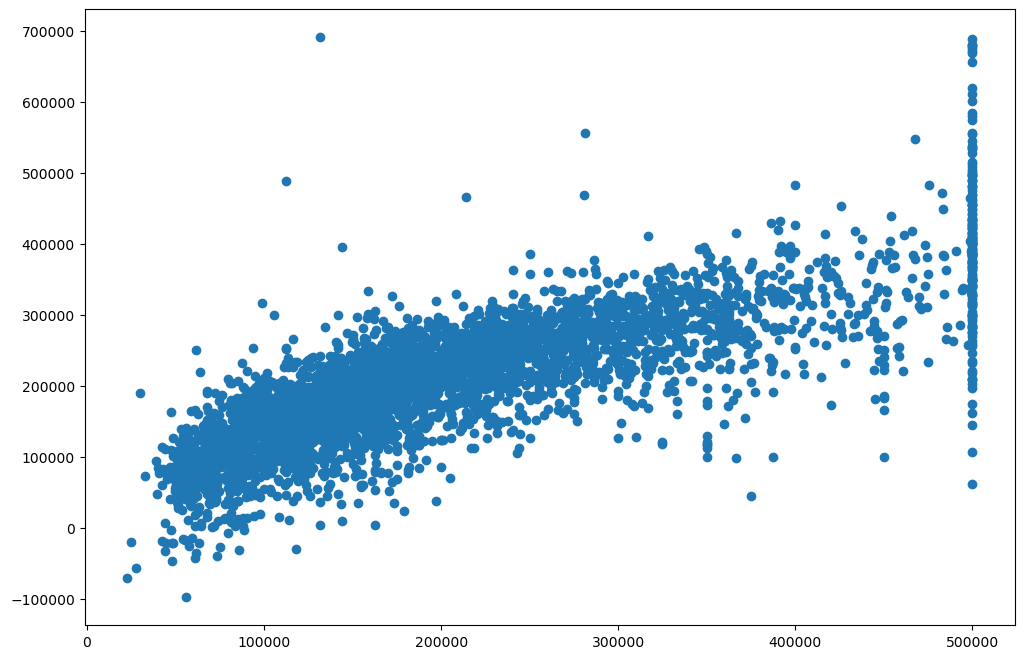

In [212]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()
